In [54]:
import numpy as np
from math import*
import numpy as np
import pickle
import matplotlib.pyplot as plt
import control.matlab as cm


In [55]:
# Filename:  cit2s.m

# Calculation of state matrix and input matrix for calculation
# of symmetric aircraft response to atmospheric turbulence.
# The system model is in the form

#       .
#       x = Ax + Bu
#       -    -    -

# with
#     x = [u/V alpha theta qc/V u_g/V alpha_g alpha_g*]'
# and
#     u = [delta_e w_1 w_3]'.

# The turbulence filters are according to Dryden.

# Cessna Citation Ce-500, landing (1)

# Checked MM June 2021 - Python version by B. Englebert (July 2021)

# INPUT TURBULENCE- AND AIRCRAFT PARAMETERS




V = 189.6
m = 5445
twmuc = 2*147
KY2 = 0.950
c = 2.022
S = 24.2
lh = 5.5

xcg = 0.3 * c
W = 53361
b = 13.36
h = 6096
rho = 0.6528
mub = 22
muc = 157
KX2 = 0.013
KZ2 = 0.037
KXZ = 0.002

# TURBULENCE PARAMETERS
sigma = 2
Lg = 150
sigmaug_V = sigma/V
sigmaag = sigma/V

# AIRCRAFT SYMMETRIC AERODYNAMIC DERIVATIVES :
CX0 = 0.0000
CZ0 = -0.1620
Cm0 = 0.0000
CXu = -0.0600
CZu = -0.3240
Cmu = 0.0000
CXa = 0.0545
CZa = -5.8000
Cma = -0.5350
CXq = 0.0000
CZq = -4.3800
Cmq = -8.0000
CXd = 0.0000
CZd = -0.5798
Cmd = -1.4440
CXfa = 0.0000
CZfa = -1.8300
Cmfa = -4.7500
CZfug = 0.0000
Cmfug = -Cm0*lh/c
CZfag = CZfa-CZq
Cmfag = Cmfa-Cmq

# CALCULATION OF AIRCRAFT SYMMETRIC STABILITY DERIVATIVES
xu = (V/c)*(CXu/twmuc)
xa = (V/c)*(CXa/twmuc)
xt = (V/c)*(CZ0/twmuc)
xq = 0
xd = (V/c)*(CXd/twmuc)
xug = xu
xfug = 0
xag = xa
xfag = 0

zu = (V/c)*(CZu/(twmuc-CZfa))
za = (V/c)*(CZa/(twmuc-CZfa))
zt = (V/c)*(-CX0/(twmuc-CZfa))
zq = (V/c)*((CZq+twmuc)/(twmuc-CZfa))
zd = (V/c)*(CZd/(twmuc-CZfa))
zug = zu
zfug = (V/c)*(CZfug/(twmuc-CZfa))
zag = za
zfag = (V/c)*(CZfag/(twmuc-CZfa))

mu = (V/c)*((Cmu+CZu*Cmfa/(twmuc-CZfa))/(twmuc*KY2))
ma = (V/c)*((Cma+CZa*Cmfa/(twmuc-CZfa))/(twmuc*KY2))
mt = (V/c)*((-CX0*Cmfa/(twmuc-CZfa))/(twmuc*KY2))
mq = (V/c)*(Cmq+Cmfa*(twmuc+CZq)/(twmuc-CZfa))/(twmuc*KY2)
md = (V/c)*((Cmd+CZd*Cmfa/(twmuc-CZfa))/(twmuc*KY2))
mug = mu
mfug = (V/c)*(Cmfug+CZfug*Cmfa/(twmuc-CZfa))/(twmuc*KY2)
mag = ma
mfag = (V/c)*(Cmfag+CZfag*Cmfa/(twmuc-CZfa))/(twmuc*KY2)

# STATE- AND INPUT MATRICES
A = np.mat([[xu, xa, xt, 0,    xug,                  xag,       0],
            [zu, za, zt, zq,   zug-zfug*V/Lg *
                (c/V),  zag,       zfag*(c/V)],
            [0,  0,  0,  V/c,  0,                    0,         0],
            [mu, ma, mt, mq,   mug-mfug*V/Lg *
                (c/V),  mag,       mfag*(c/V)],
            [0,  0,  0,  0,   -V/Lg,                 0,         0],
            [0,  0,  0,  0,    0,                    0,         1],
            [0,  0,  0,  0,    0,                   -(V/Lg)**2, -2*V/Lg]])

B = np.mat([[xd, 0,                                 0],
            [zd, zfug*(c/V)*sigmaug_V*sqrt(2*V/Lg),
            zfag*(c/V)*sigmaag*sqrt(3*V/Lg)],
            [0,  0,                                 0],
            [md, mfug*(c/V)*sigmaug_V*sqrt(2*V/Lg),
            mfag*(c/V)*sigmaag*sqrt(3*V/Lg)],
            [0,  sigmaug_V*sqrt(2*V/Lg),            0],
            [0,  0,
                sigmaag*sqrt(3*V/Lg)],
            [0,  0,                                 (1-2*sqrt(3))*sigmaag*sqrt((V/Lg)**3)]])

C = np.eye(A.shape[0])
D = np.zeros(B.shape)


# # GAIN FACTORS FOR AUTOPILOT CHAPTER 7 AND DEFINITION OF MATRIX At
# # (approximately "Dead Beat" damping)
# Kt = -0.21
# Kq = -3      # gains on "theta" and "q"
# K = np.array([0, 0, Kt, Kq, 0, 0, 0])  # feedback matrix
# At = A-B[:, 0]*K         # new A matrix = (A - BK) because of feedback


In [56]:
Ar = np.delete(np.delete(A, [0, 2], axis=0), [0, 2], axis=1)
Br = np.delete(B, [0, 2], axis=0)
Cr = np.delete(np.delete(C, [0, 2], axis=0), [0, 2], axis=1)
Dr = np.delete(D, [0, 2], axis=0)


In [57]:
print(Ar.shape)
print(Br.shape)
print(Cr.shape)
print(Dr.shape)

(5, 5)
(5, 3)
(5, 5)
(5, 3)


In [59]:
sys = cm.ss(A, B, C, D)
sysr = cm.ss(Ar, Br, Cr, Dr)


In [60]:
# damping ratio and natural frequency
cm.damp(sys)

cm.damp(sysr)

_____Eigenvalue______ Damping___ Frequency_
    -3.043    +3.488j     0.6574      4.629
    -3.043    -3.488j     0.6574      4.629
 -0.009285  +0.06391j     0.1438    0.06458
 -0.009285  -0.06391j     0.1438    0.06458
    -1.264                     1      1.264
    -1.264                     1      1.264
    -1.264                     1      1.264
_____Eigenvalue______ Damping___ Frequency_
    -3.043    +3.488j     0.6573      4.629
    -3.043    -3.488j     0.6573      4.629
    -1.264                     1      1.264
    -1.264                     1      1.264
    -1.264                     1      1.264


(array([4.62884742, 4.62884742, 1.264     , 1.264     , 1.264     ]),
 array([0.65734029, 0.65734029, 1.        , 1.        , 1.        ]),
 array([-3.04272792+3.48827109j, -3.04272792-3.48827109j,
        -1.264     +0.j        , -1.264     +0.j        ,
        -1.264     +0.j        ]))

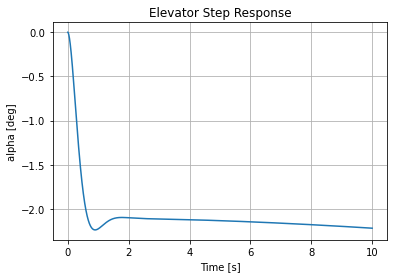

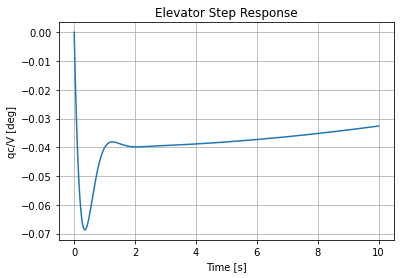

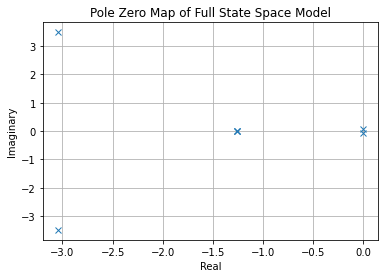

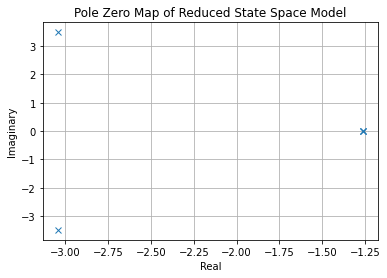

In [63]:

# elevator step response
yout, T = cm.step(sys, T=np.linspace(0, 10, 2000),  input=0)

# plot step response of 2nd state
plt.figure(2)
plt.plot(T, yout[:, 1])
plt.title('Elevator Step Response')
plt.xlabel('Time [s]')
plt.ylabel('alpha [deg]')
plt.grid()
plt.show()

plt.figure(3)
plt.plot(T, yout[:, 3])
plt.title('Elevator Step Response')
plt.xlabel('Time [s]')
plt.ylabel('qc/V [deg]')
plt.grid()
plt.show()

# plot eigenvalues of A matrix
plt.figure(0)
plt.plot(np.real(eigA), np.imag(eigA), 'x')
plt.title('Pole Zero Map of Full State Space Model')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.grid()
plt.show()
# plot eigenvalues of Ar matrix
plt.figure(1)
plt.plot(np.real(eigAr), np.imag(eigAr), 'x')
plt.title('Pole Zero Map of Reduced State Space Model')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.grid()
plt.show()
